In [ ]:
!conda install geopandas
## arcgis 분석툴 비싼애 분석할때 예쁜것들 이런거 지원 한글지원은 x 위치기반전용툴 학생용 있다.
## power gis
## 위치기반 시스템 지오판다스 이용!! 가운데 중점 보여주고
## 분석결과까지만!!! 시스템화는 다른식으로 카카오맵 api 지도상에 표시해주는식으로 해야한다.

## 분석 -> 시스템

## 분석(데이터수집) +  시스템만드는사람(프레임워크 만들어서) 합친다.
## 초기분석을 위한 데이터 다음주 수집
## 5주차 딥러닝 머신러닝 끝내고 6주차 수집 더하고 각자 프로젝트


In [1]:
import geopandas as gpd  ## 연습용 데이터

In [16]:
dir(gpd)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'base',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'overlay',
 'pd',
 'plotting',
 'read_file',
 'read_postgis',
 'sjoin',
 'tools']

In [ ]:
# dataset 연습용 데이터셋 쓸수 있다.

In [2]:
%matplotlib inline ## 안하면 그림 안나옴 import 안하면  #
                    ## 무조건 임포트하면 메모리 낭비 그레서 %

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [19]:
type(world) ## lowres저해상도

geopandas.geodataframe.GeoDataFrame

In [4]:
gpd.datasets.available # 사용가능한 데이터

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [ ]:
# dask는 판다스(메모리에 다올림)다 메모리에 올리면 다못처리 분산처리해주는거 dask geopandas 랑 비슷한 방식쓴다
# 병행해서 분산처리 가능 R은 못함
# 

In [20]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
pop_est       177 non-null float64
continent     177 non-null object
name          177 non-null object
iso_a3        177 non-null object
gdp_md_est    177 non-null float64
geometry      177 non-null object
dtypes: float64(2), object(4)
memory usage: 8.4+ KB


In [59]:
world_cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [21]:
world.head() ## 위치를 다각형으로 표현 ## object인 이유 객체 저장 가능해서 우리는 그동안 string만저장

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


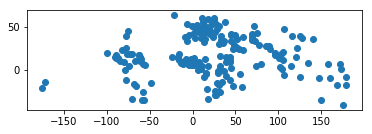

In [22]:
world_cities.plot()

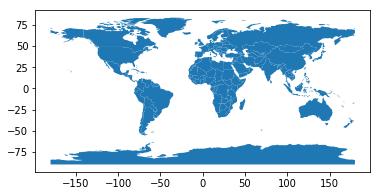

In [8]:
world.plot()

In [26]:
world.centroid
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid_column
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",POINT (66.08669022192834 33.85639928169076)
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,POINT (17.47057255231345 -12.24586903613316)
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",POINT (20.03242643144321 41.14135330604877)
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",POINT (54.20671476159633 23.86863365334761)
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,POINT (-65.17536077114174 -35.44682148949509)
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,...",POINT (45.00029001101479 40.21660761230144)
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...,POINT (20.57100056984261 -80.49198288284349)
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48...",POINT (69.53158047042371 -49.30645491167198)
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...,POINT (134.502775475366 -25.73065477972607)
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,...",POINT (14.07615888433708 47.61394879274629)


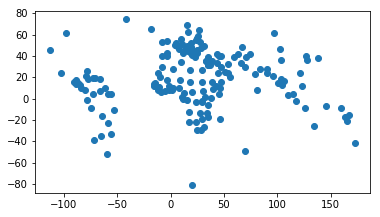

In [24]:
world['centroid_column'] = world.centroid  ##centroid_column 지역의 중앙점 컬럼 추가
world = world.set_geometry('centroid_column') ## 각 좌표들을 이동해서 중심점 기반 좌표 생성
world.plot()

0        POINT (66.08669022192834 33.85639928169076)
1       POINT (17.47057255231345 -12.24586903613316)
2        POINT (20.03242643144321 41.14135330604877)
3        POINT (54.20671476159633 23.86863365334761)
4      POINT (-65.17536077114174 -35.44682148949509)
                           ...                      
172     POINT (167.0737512682268 -15.54267705755496)
173        POINT (47.53504475854349 15.913231950143)
174     POINT (25.04801387986167 -28.94703325997912)
175     POINT (27.72759193998218 -13.39506752005761)
176      POINT (29.78854837189252 -18.9069879478588)
Name: centroid_column, Length: 177, dtype: object

In [10]:
world.geometry.name

'centroid_column'

In [28]:
import fiona  ## 어떤 위치데이터 정보를 읽는가를 체크

In [29]:
fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'CSV': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GML': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

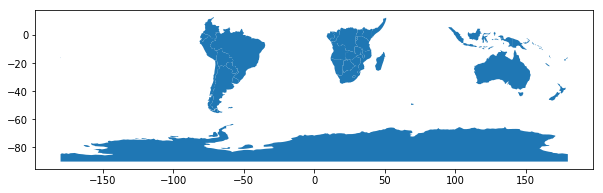

In [93]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  ## 지도에서도 슬라이싱 된다.
#southern_world = world.cx[-10:50, -20:30] ## cx 주심부터 영역 자른다
southern_world.plot(figsize=(10, 3)) ## maplotlib  지도 전ㅊ 크기 // 가로 세로 그림 크기
southern_world = world.cx[:,:0] ## cx 주심부터 영역 자른다

In [31]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


C:\Users\legen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


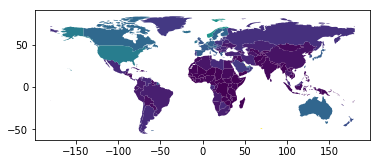

In [32]:
world = world[(world.pop_est>0) & (world.continent!="Antarctica")] ## 조건써서 지오데이터인덱싱
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est ##브로드캐스팅
world.plot(column='gdp_per_cap')  

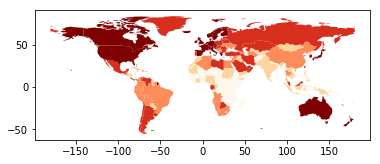

In [33]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles') ## cmap 색깔

In [96]:
seoul = gpd.read_file('asset/seoul_shp',encoding='utf-8') ##arc gis 에서 서울지도 export

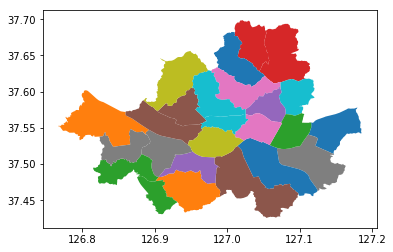

In [97]:
seoul.plot(column='name')  ## ()안 컬럼=name 별로 구분, 단계별로도 구분가능!!!!! 영역별로 숫자 박을수 있따. FOLIUM 안됫음

In [98]:
seoul.head()


,code,name,name_eng,base_year,geometry
0,11250,강동구,Gangdong-gu,2013,"POLYGON ((127.1151958498161 37.55753318070492,..."
1,11240,송파구,Songpa-gu,2013,"POLYGON ((127.0690698130372 37.52227942350503,..."
2,11230,강남구,Gangnam-gu,2013,"POLYGON ((127.058673592884 37.52629974922568, ..."
3,11220,서초구,Seocho-gu,2013,"POLYGON ((127.0139711966751 37.52503988289669,..."
4,11210,관악구,Gwanak-gu,2013,"POLYGON ((126.9610898906183 37.49100376129394,..."


In [105]:
seoul[seoul['name']=='강남구']['geometry'].representative_point()## .representative_point() 중심점 찾아준다.

AttributeError: 'GeoSeries' object has no attribute 'coords'

In [107]:
seoul['coords'] = seoul['geometry'].apply(lambda x: x.representative_point().coords[:]) ## re!!
seoul['coords'] = [coords[0] for coords in seoul['coords']]

In [108]:
seoul['coords'] ## 대표점들만 뽑아서 글자나 숫자 박아버린다.

0       (127.14965459147774, 37.5458145865803)
1     (127.10957091651335, 37.501524726531805)
2      (127.05849837530079, 37.49596105443298)
3     (127.01525250095538, 37.475284511024014)
4      (126.95280839655175, 37.46264950597657)
5     (126.95376570858319, 37.494901149141086)
6     (126.91297795389241, 37.514725063966495)
7       (126.9018898626737, 37.45727993340848)
8        (126.8557933305959, 37.4926173146293)
9      (126.82320157973182, 37.56278490192719)
10     (126.85650557149393, 37.52289649957123)
11     (126.90251101160129, 37.55770130315089)
12    (126.93616119683995, 37.578948873392825)
13     (126.92842770585742, 37.61461963474714)
14      (127.073025869766, 37.652460968460574)
15     (127.03481041600926, 37.66352675752526)
16     (127.00684691561928, 37.64440262491334)
17     (127.02943753416287, 37.60423130693352)
18     (127.09603203290149, 37.59232010883308)
19     (127.05489167575487, 37.58188191373469)
20    (127.09201759514929, 37.545658640150705)
21    (127.04

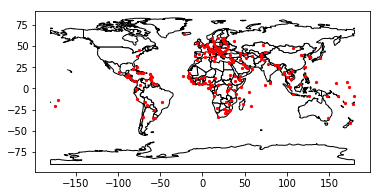

In [38]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')) 
 

base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5);

In [39]:
import matplotlib.pyplot as plt

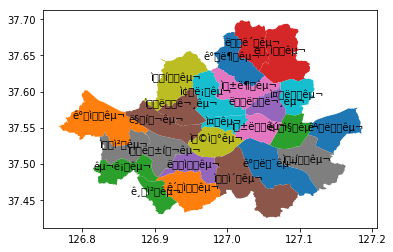

In [40]:
seoul.plot(column='name')  ## name 기준 색 다르게
                            ## tips get iter 있음 for 돌릴수 있따. items
for idx, row in seoul.iterrows():
    plt.annotate(s=row['name'], xy=row['coords'],  ## 지역에 이름 찍는 코드 annotate
                 horizontalalignment='center')

In [41]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(font_list)

NameError: name 'fm' is not defined

In [ ]:
import matplotlib.font_manager as fm
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)



In [42]:
import matplotlib.pyplot as plt

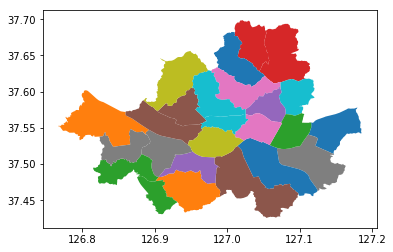

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
seoul.plot(ax= ax, column='name')


In [44]:
seoul_x = seoul.centroid.apply(lambda p: p.x)
seoul_y = seoul.centroid.apply(lambda p: p.y)

In [45]:
len(seoul_x)

25

In [46]:
seoulcen = seoul.copy()
seoulcen['geometry'] = seoul.geometry.centroid

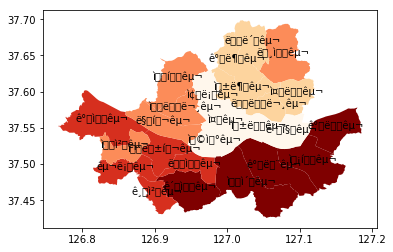

In [47]:
seoul.plot(column='code', cmap='OrRd', scheme='quantiles')
for idx, row in seoulcen.iterrows():
    plt.annotate(s=row['name'], xy=[row['geometry'].x,row['geometry'].y],
                 horizontalalignment='center')

In [48]:
for name,centroid in zip(seoul.name,seoul.centroid):
    print(i)
    #plt.text(centroid, name, fontsize=12)

NameError: name 'i' is not defined

In [49]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [50]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Check original projection
# (it's Platte Carre! x-y are long and lat)
world.crs

{'init': 'epsg:4326'}

Text(0.5,1,'WGS84 (lat/lon)')

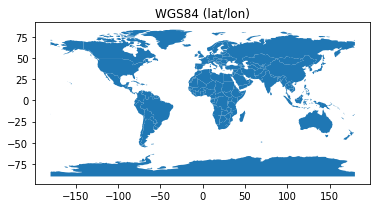

In [51]:
# Visualize
ax = world.plot()

ax.set_title("WGS84 (lat/lon)")

In [52]:
# Reproject to Mercator (after dropping Antartica)
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

world = world.to_crs({'init': 'epsg:3395'}) # world.to_crs(epsg=3395) would also work

ax = world.plot()

ax.set_title("Mercator");

RuntimeError: b'no arguments in initialization list'

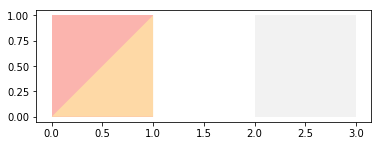

In [53]:
from shapely.geometry import Polygon

p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

g = gpd.GeoSeries([p1, p2, p3])
g.plot(cmap='Pastel1')


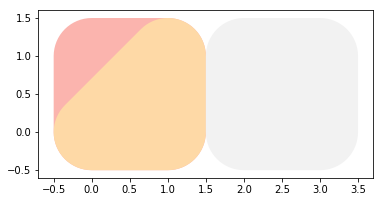

In [54]:
g.buffer(0.5).plot(cmap='Pastel1')

In [55]:
nybb_path = gpd.datasets.get_path('nybb')
boros = gpd.GeoDataFrame.from_file(nybb_path) 
boros.set_index('BoroCode', inplace=True)
boros = boros.sort_index()
boros

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...
3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...


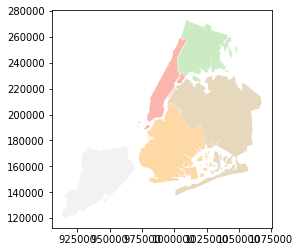

In [56]:
boros.plot(cmap='Pastel1')

In [57]:
from shapely.geometry import Point
import numpy as np

xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000

xc = (xmax - xmin) * np.random.random(2000) + xmin

yc = (ymax - ymin) * np.random.random(2000) + ymin 

pts = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

In [58]:
circles = pts.buffer(2000)

In [ ]:
mp = circles.unary_union

In [ ]:
holes = boros['geometry'].intersection(mp)

In [ ]:
holes.plot(cmap='Pastel1')

In [ ]:
circles = pts.buffer(2000) # 2000 안에 있는 Points만 남김

mp = circles.unary_union # circles를 하나로 합침

boros_with_holes = boros['geometry'].difference(mp)

boros_with_holes.plot(cmap='Pastel1')

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry']]
continents = world.dissolve(by='continent')
continents.head()

In [ ]:
continents.plot()

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry', 'pop_est']]
continents = world.dissolve(by='continent', aggfunc='sum')
continents.head()

In [ ]:
continents.plot(column = 'pop_est', scheme='quantiles', cmap='YlOrRd');